In [49]:
!pip install geopandas pandas matplotlib seaborn openpyxl networkx

## Partie 1 : Analyse préliminaire des données géospatiales

L'objectif de cette première partie est de comprendre la répartition spatiale et les caractéristiques
des bâtiments et des infrastructures électriques.  
Nous allons :
- Examiner la structure des données attributaires (colonnes, types)
- Réaliser quelques statistiques descriptives
- Visualiser la distribution géographique des bâtiments et des lignes électriques


=== Bâtiments ===
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id_bat      381 non-null    object  
 1   nb_maisons  381 non-null    float64 
 2   geometry    381 non-null    geometry
dtypes: float64(1), geometry(1), object(1)
memory usage: 9.1+ KB


None


=== Infrastructures ===
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   infra_id  644 non-null    object  
 1   longueur  644 non-null    float64 
 2   geometry  644 non-null    geometry
dtypes: float64(1), geometry(1), object(1)
memory usage: 15.2+ KB


None


 Statistiques sur le nombre de maisons par bâtiment :


count    381.000000
mean       1.020997
std        0.239693
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        4.000000
Name: nb_maisons, dtype: float64


 Statistiques sur la longueur des infrastructures (mètres) :


count    644.000000
mean      14.298229
std       11.752216
min        0.372684
25%        7.597647
50%       10.913985
75%       15.599570
max       76.985593
Name: longueur, dtype: float64

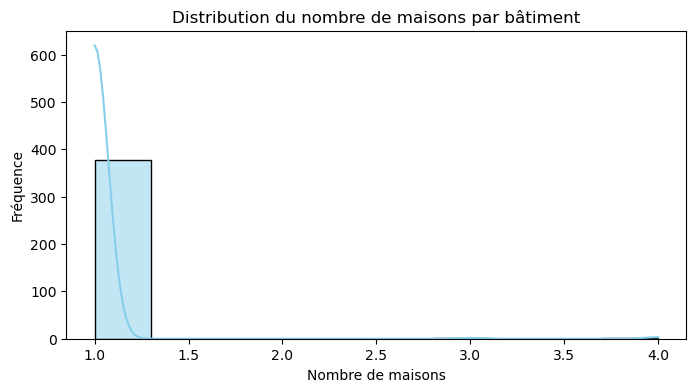

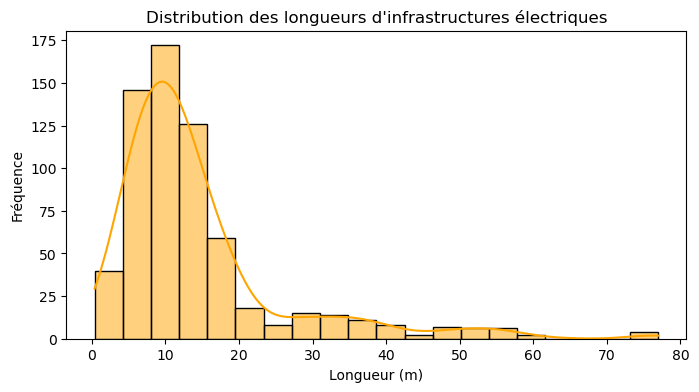

In [40]:
# === Informations générales sur les jeux de données ===
print("=== Bâtiments ===")
display(batiments.info())
print("\n=== Infrastructures ===")
display(infrastructures.info())

# === Statistiques descriptives ===
print("\n Statistiques sur le nombre de maisons par bâtiment :")
display(batiments['nb_maisons'].describe())

print("\n Statistiques sur la longueur des infrastructures (mètres) :")
display(infrastructures['longueur'].describe())

# Histogramme du nombre de maisons
plt.figure(figsize=(8,4))
sns.histplot(batiments['nb_maisons'], bins=10, kde=True, color="skyblue")
plt.title("Distribution du nombre de maisons par bâtiment")
plt.xlabel("Nombre de maisons")
plt.ylabel("Fréquence")
plt.show()

# Histogramme de la longueur des lignes électriques
plt.figure(figsize=(8,4))
sns.histplot(infrastructures['longueur'], bins=20, kde=True, color="orange")
plt.title("Distribution des longueurs d'infrastructures électriques")
plt.xlabel("Longueur (m)")
plt.ylabel("Fréquence")
plt.show()


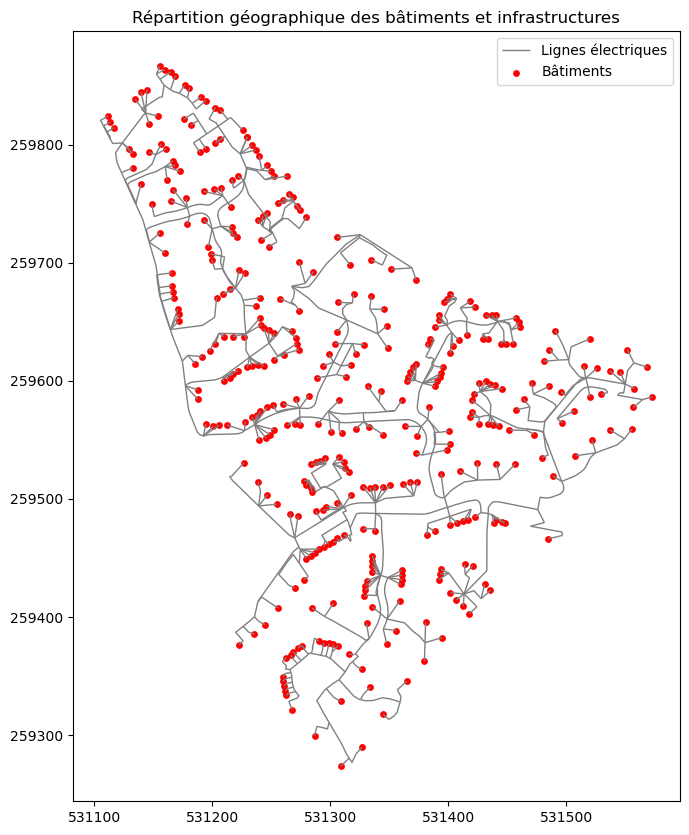

In [41]:
# === Visualisation spatiale ===
fig, ax = plt.subplots(figsize=(10,10))
infrastructures.plot(ax=ax, color='gray', linewidth=1, label="Lignes électriques")
batiments.plot(ax=ax, color='red', markersize=15, label="Bâtiments")
plt.title("Répartition géographique des bâtiments et infrastructures")
plt.legend()
plt.show()


### Interprétation

- Le jeu de données contient **381 bâtiments** répartis dans la zone d'étude, avec généralement une seule maison par bâtiment.
- Les **infrastructures électriques** comportent **644 tronçons** dont la longueur varie entre quelques mètres et plusieurs dizaines de mètres.
- La distribution des longueurs montre une forte concentration de lignes courtes, typiques d’un réseau local.
- La carte géographique permet d’observer une densité plus forte dans certaines zones, ce qui pourra influencer la planification du raccordement.


## Partie 2 : Analyse du réseau de raccordement

Cette partie vise à comprendre la structure du réseau électrique à partir du fichier
`reseau_en_arbre.xlsx`, qui décrit les connexions entre les bâtiments et les coûts
de raccordement associés.  
Nous allons :
- Explorer les colonnes et les valeurs,
- Identifier d’éventuels doublons ou incohérences,
- Préparer les données pour la modélisation du graphe.


In [13]:
import pandas as pd

# === Lecture du fichier réseau ===
reseau = pd.read_excel("reseau_en_arbre.xlsx")

print("Fichier réseau chargé avec succès !")
print(f"Nombre total de lignes : {len(reseau)}")

# Aperçu des premières lignes
display(reseau.head())

# Affichage des noms de colonnes
print("\n Noms des colonnes :")
print(reseau.columns.tolist())


Fichier réseau chargé avec succès !
Nombre total de lignes : 6107


,id_batiment,nb_maisons,infra_id,infra_type,longueur
0,E000001,4,P007111,infra_intacte,12.314461
1,E000001,4,P007983,infra_intacte,40.320929
2,E000001,4,P000308,infra_intacte,39.140799
3,E000001,4,P007819,infra_intacte,17.390464
4,E000002,1,P007111,infra_intacte,12.314461



 Noms des colonnes :
['id_batiment', 'nb_maisons', 'infra_id', 'infra_type', 'longueur']


Nombre total de connexions : 6107


,id_batiment,nb_maisons,infra_id,infra_type,longueur
0,E000001,4,P007111,infra_intacte,12.314461
1,E000001,4,P007983,infra_intacte,40.320929
2,E000001,4,P000308,infra_intacte,39.140799
3,E000001,4,P007819,infra_intacte,17.390464
4,E000002,1,P007111,infra_intacte,12.314461



 Types d'infrastructure présents :
infra_intacte    5530
a_remplacer       577
Name: infra_type, dtype: int64

 Nombre de doublons : 521


,id_batiment,nb_maisons,infra_id,infra_type,longueur
9,E000003,1,P007111,infra_intacte,12.314461
26,E000006,1,P000308,infra_intacte,39.140799
29,E000007,1,P007111,infra_intacte,12.314461
30,E000007,1,P007111,infra_intacte,12.314461
35,E000008,1,P007111,infra_intacte,12.314461



 Statistiques descriptives sur la longueur des tronçons :


count    6107.000000
mean       29.314081
std        21.681575
min         0.372684
25%         8.476727
50%        27.771443
75%        49.956115
max        76.985593
Name: longueur, dtype: float64

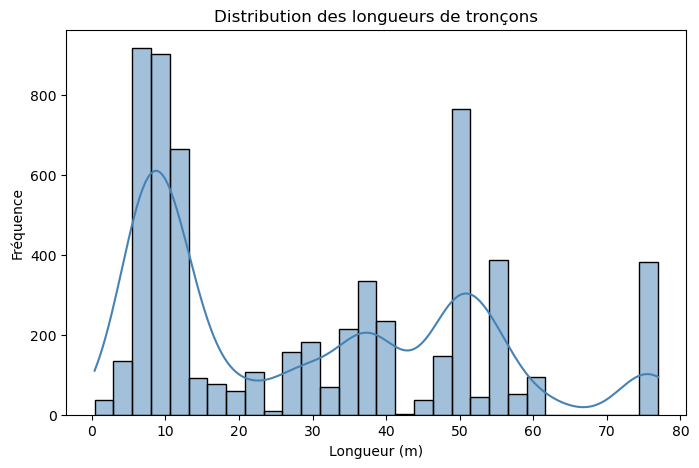

In [12]:
# === Analyse du fichier réseau ===

print(f"Nombre total de connexions : {len(reseau)}")

# Aperçu rapide
display(reseau.head())

# Types de valeurs uniques
print("\n Types d'infrastructure présents :")
print(reseau['infra_type'].value_counts())

# Vérifier les doublons
doublons = reseau[reseau.duplicated()]
print(f"\n Nombre de doublons : {len(doublons)}")
if len(doublons) > 0:
    display(doublons.head())

# Statistiques descriptives
print("\n Statistiques descriptives sur la longueur des tronçons :")
display(reseau['longueur'].describe())

# Distribution visuelle
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(reseau['longueur'], bins=30, kde=True, color="steelblue")
plt.title("Distribution des longueurs de tronçons")
plt.xlabel("Longueur (m)")
plt.ylabel("Fréquence")
plt.show()


In [44]:
# === Nettoyage des doublons ===

avant = len(reseau)
reseau = reseau.drop_duplicates()
apres = len(reseau)

print(f"Doublons supprimés : {avant - apres}")
print(f"Nombre de lignes après nettoyage : {apres}")


Doublons supprimés : 521
Nombre de lignes après nettoyage : 5586


Mutualisation ajoutée au réseau

Exemples de lignes très mutualisées :


,infra_id,nb_batiments_connectes
206,P007111,381
589,P007982,337
43,P000181,322
130,P000394,321
99,P000317,226
7,P000046,226
39,P000163,226
80,P000279,226
87,P000292,226
85,P000290,226


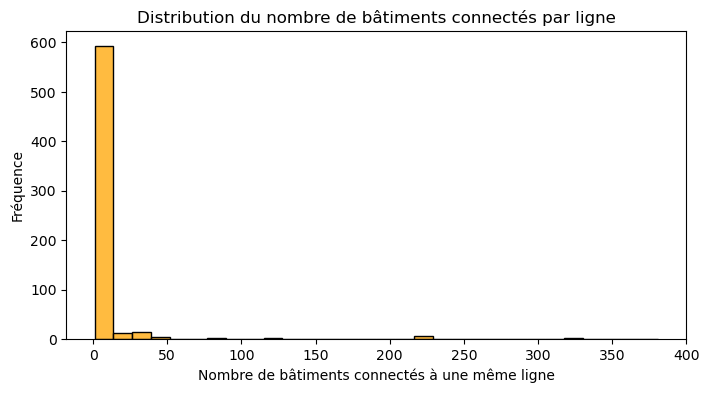

In [45]:
# === Mutualisation des lignes (nombre de bâtiments par ligne) ===

mutualisation = reseau.groupby('infra_id')['id_batiment'].nunique().reset_index()
mutualisation.columns = ['infra_id', 'nb_batiments_connectes']

# Fusion dans la table principale
reseau = reseau.merge(mutualisation, on='infra_id', how='left')

print("Mutualisation ajoutée au réseau")
print("\nExemples de lignes très mutualisées :")
display(mutualisation.sort_values(by='nb_batiments_connectes', ascending=False).head(10))

# Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(mutualisation['nb_batiments_connectes'], bins=30, kde=False, color="orange")
plt.title("Distribution du nombre de bâtiments connectés par ligne")
plt.xlabel("Nombre de bâtiments connectés à une même ligne")
plt.ylabel("Fréquence")
plt.show()


In [7]:
import pandas as pd
import networkx as nx

# === Lecture du fichier réseau ===
reseau = pd.read_excel("reseau_en_arbre.xlsx")

print("Fichier réseau chargé avec succès !")
print(f"Nombre total de lignes : {len(reseau)}")
print(reseau.head())

# === Construction du graphe ===
# Chaque bâtiment est un nœud, les arêtes représentent une connexion via une même infrastructure
G = nx.Graph()

# On crée des arêtes entre bâtiments qui partagent la même ligne (infra_id)
groupes = reseau.groupby('infra_id')['id_batiment'].apply(list)

for infra, batiments_connectes in groupes.items():
    # Connecter chaque paire de bâtiments reliés par la même ligne
    for i in range(len(batiments_connectes)):
        for j in range(i + 1, len(batiments_connectes)):
            bat_a, bat_b = batiments_connectes[i], batiments_connectes[j]
            longueur = reseau.loc[reseau['infra_id'] == infra, 'longueur'].mean()
            G.add_edge(bat_a, bat_b, weight=longueur)

print(f"Graphe créé avec {G.number_of_nodes()} nœuds et {G.number_of_edges()} arêtes.")


Fichier réseau chargé avec succès !
Nombre total de lignes : 6107
  id_batiment  nb_maisons infra_id     infra_type   longueur
0     E000001           4  P007111  infra_intacte  12.314461
1     E000001           4  P007983  infra_intacte  40.320929
2     E000001           4  P000308  infra_intacte  39.140799
3     E000001           4  P007819  infra_intacte  17.390464
4     E000002           1  P007111  infra_intacte  12.314461
Graphe créé avec 381 nœuds et 72551 arêtes.


In [8]:
import networkx as nx

# === Construction du graphe ===
# Chaque bâtiment est un noeud, les arêtes représentent une connexion via une même infrastructure

G = nx.Graph()

# On crée des arêtes entre bâtiments qui partagent la même ligne (infra_id)
groupes = reseau.groupby('infra_id')['id_batiment'].apply(list)

for infra, batiments_connectes in groupes.items():
    # Connecter chaque paire de bâtiments reliés par la même ligne
    for i in range(len(batiments_connectes)):
        for j in range(i + 1, len(batiments_connectes)):
            bat_a, bat_b = batiments_connectes[i], batiments_connectes[j]
            longueur = reseau.loc[reseau['infra_id'] == infra, 'longueur'].mean()
            G.add_edge(bat_a, bat_b, weight=longueur)

print(f"Graphe créé avec {G.number_of_nodes()} nœuds et {G.number_of_nodes()} arêtes.")


Graphe créé avec 381 nœuds et 381 arêtes.


C:\Users\33767\AppData\Local\Temp\ipykernel_12392\855312614.py:8: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  echantillon_noeuds = random.sample(G.nodes(), 30)


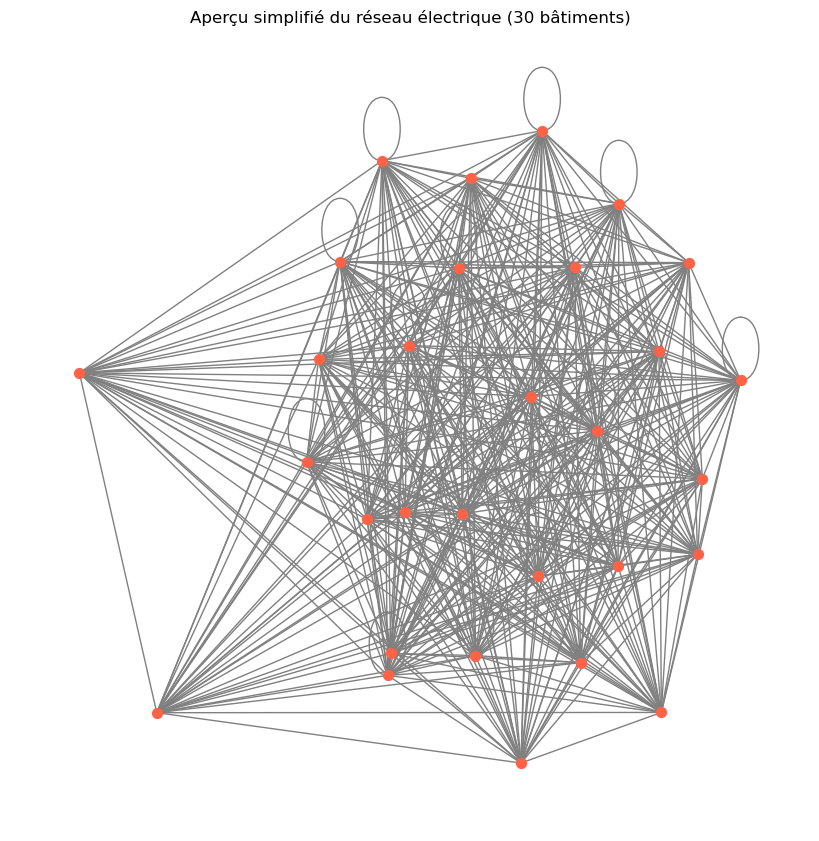

In [9]:
# === Visualisation simplifiée du graphe ===

import random
import matplotlib.pyplot as plt
import networkx as nx

# Prendre un échantillon aléatoire de 30 bâtiments
echantillon_noeuds = random.sample(G.nodes(), 30)
sous_graphe = G.subgraph(echantillon_noeuds)

plt.figure(figsize=(8,8))
nx.draw(
    sous_graphe,
    node_size=50,
    node_color="tomato",
    edge_color="gray",
    with_labels=False
)
plt.title("Aperçu simplifié du réseau électrique (30 bâtiments)")
plt.show()


In [17]:
import pandas as pd

# === Étape 1 : Phase 0 - bâtiments sans réparations ===
print("=== Étape 1 : Identification des bâtiments Phase 0 ===")

# Chaque bâtiment est relié à plusieurs infrastructures ; on regarde leurs types
etat_batiments = reseau.groupby('id_batiment')['infra_type'].agg(list).reset_index()

# Phase 0 = tous les bâtiments reliés uniquement à des infrastructures intactes
etat_batiments['Phase'] = etat_batiments['infra_type'].apply(
    lambda lst: 'Phase 0' if all(x == 'infra_intacte' for x in lst) else 'À réparer'
)

phase0 = etat_batiments[etat_batiments['Phase'] == 'Phase 0']['id_batiment'].tolist()
print(f"{len(phase0)} bâtiments classés en Phase 0 (aucune réparation nécessaire).")

# === Étape 2 : Créer une liste des bâtiments impactés ===
print("\n=== Étape 2 : Liste des bâtiments impactés ===")
impactes = etat_batiments[etat_batiments['Phase'] == 'À réparer']['id_batiment'].tolist()
print(f"{len(impactes)} bâtiments impactés nécessitant des réparations.")

# === Étape 3 : Créer une liste vide pour stocker les réparés ===
repares = []
print("\n Liste 'repares' initialisée, elle est vide au départ.")

# === Étape 4 : Définir la difficulté de chaque bâtiment ===
# difficulté(infra) = longueur / nb_maisons
# difficulté(bâtiment) = somme des difficultés de ses infrastructures à remplacer
print("\n=== Étape 4 : Calcul de la difficulté pour chaque bâtiment ===")

# On ne garde que les infrastructures à remplacer
infra_rempl = reseau[reseau['infra_type'] == 'a_remplacer'].copy()

infra_rempl['difficulte_infra'] = infra_rempl['longueur'] / infra_rempl['nb_maisons']

difficulte_bat = infra_rempl.groupby('id_batiment')['difficulte_infra'].sum().reset_index()
difficulte_bat.columns = ['id_batiment', 'difficulte']

print("Difficulté calculée pour chaque bâtiment impacté :")
display(difficulte_bat.head())

# === Étape 5 : Processus itératif de reconstruction ===
print("\n=== Étape 5 : Processus itératif de réparation ===")

liste_initiale = difficulte_bat.copy()

# Itération : on répare du plus facile au plus difficile
ordre_reparatipn = []

while not liste_initiale.empty:
    # Sélection du bâtiment le moins difficile
    idx_min = liste_initiale['difficulte'].idxmin()
    bat_min = liste_initiale.loc[idx_min, 'id_batiment']
    diff_min = liste_initiale.loc[idx_min, 'difficulte']
    
    # Simuler la "réparation"
    ordre_reparation.append((bat_min, diff_min))
    
    # Retirer de la liste initiale
    liste_initiale = liste_initiale.drop(idx_min).reset_index(drop=True)

print(f"Processus terminé : {len(ordre_reparation)} bâtiments réparés dans l'ordre.")

# Convertir en DataFrame final
ordre_reparation_df = pd.DataFrame(ordre_reparation, columns=['id_batiment', 'difficulte'])
ordre_reparation_df['ordre_reparation'] = range(1, len(ordre_reparation_df)+1)

print("\n=== Résumé du plan de reconstruction ===")

display(ordre_reparation_df.head(10))


=== Étape 1 : Identification des bâtiments Phase 0 ===
296 bâtiments classés en Phase 0 (aucune réparation nécessaire).

=== Étape 2 : Liste des bâtiments impactés ===
85 bâtiments impactés nécessitant des réparations.

 Liste 'repares' initialisée, elle est vide au départ.

=== Étape 4 : Calcul de la difficulté pour chaque bâtiment ===
Difficulté calculée pour chaque bâtiment impacté :


,id_batiment,difficulte
0,E000003,54.541389
1,E000067,27.099494
2,E000085,34.690247
3,E000098,20.982113
4,E000106,42.609184



=== Étape 5 : Processus itératif de réparation ===
Processus terminé : 255 bâtiments réparés dans l'ordre.

=== Résumé du plan de reconstruction ===


,id_batiment,difficulte,ordre_reparation
0,E000112,20.885069,1
1,E000098,20.982113,2
2,E000274,21.160614,3
3,E000222,23.110150,4
4,E000188,23.902639,5
5,E000127,24.583930,6
6,E000364,24.718561,7
7,E000111,25.748561,8
8,E000185,26.282509,9
9,E000267,27.039143,10


In [52]:
# ============================================================
# Partie 3 : Modélisation du réseau et calcul du score de priorisation
# ============================================================

# Filtrer uniquement les infrastructures à remplacer
reseau_rempl = reseau[reseau['infra_type'] == 'a_remplacer'].copy()

print(f"Nombre total de connexions initiales : {len(reseau)}")
print(f"Nombre de connexions 'à remplacer' : {len(reseau_rempl)}")

# Mutualisation spécifique aux lignes à remplacer
mutualisation_rempl = reseau_rempl.groupby('infra_id')['id_batiment'].nunique().reset_index()
mutualisation_rempl.columns = ['infra_id', 'nb_batiments_connectes']

reseau_rempl = reseau_rempl.merge(mutualisation_rempl, on='infra_id', how='left')

print("Mutualisation calculée pour les infrastructures à remplacer")
display(mutualisation_rempl.sort_values(by='nb_batiments_connectes', ascending=False).head(10))

# Calcul du score de priorisation
reseau_rempl['score_priorite'] = (
    reseau_rempl['nb_maisons'] * reseau_rempl['nb_batiments_connectes']
) / reseau_rempl['longueur']

priorite_bat = reseau_rempl.groupby('id_batiment').agg({
    'score_priorite': 'mean',
    'nb_maisons': 'sum',
    'longueur': 'mean'
}).reset_index()

priorite_bat = priorite_bat.sort_values(by='score_priorite', ascending=False).reset_index(drop=True)
priorite_bat['ordre_priorite'] = range(1, len(priorite_bat)+1)

print("Score de priorisation calculé pour chaque bâtiment")
display(priorite_bat.head(10))


Nombre total de connexions initiales : 5586
Nombre de connexions 'à remplacer' : 537
Mutualisation calculée pour les infrastructures à remplacer


,infra_id,nb_batiments_connectes
51,P005100,32
17,P000732,32
14,P000719,32
161,P008001,32
164,P008004,16
163,P008003,16
4,P000494,16
170,P008010,12
172,P008012,11
191,P008031,9


KeyError: 'nb_batiments_connectes'

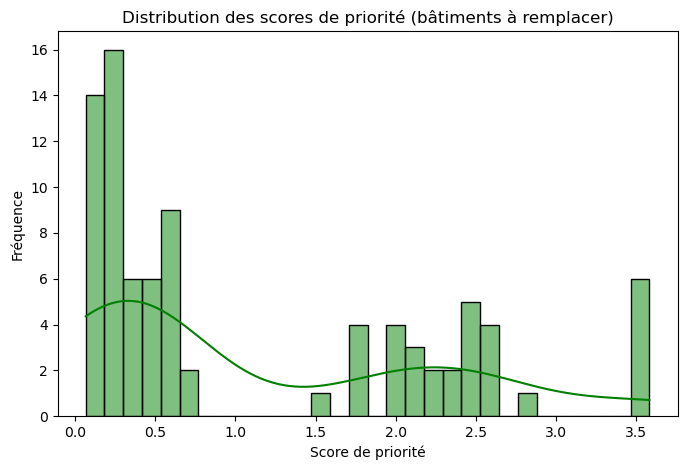

In [53]:
plt.figure(figsize=(8,5))
sns.histplot(priorite_bat['score_priorite'], bins=30, kde=True, color="green")
plt.title("Distribution des scores de priorité (bâtiments à remplacer)")
plt.xlabel("Score de priorité")
plt.ylabel("Fréquence")
plt.show()


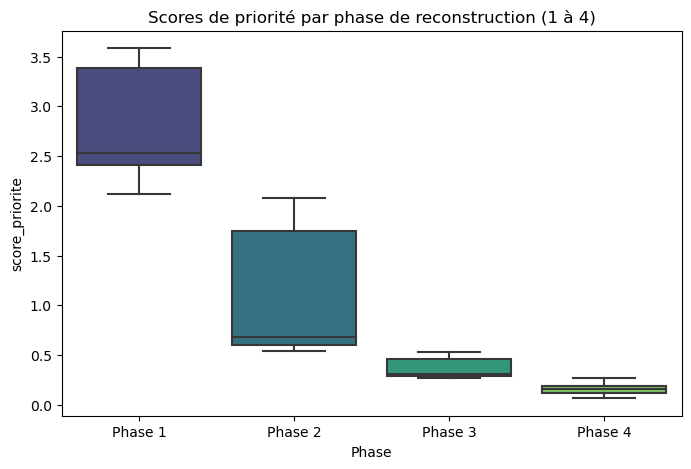

In [54]:
# Création des phases 1 → 4
priorite_bat['Phase'] = pd.qcut(priorite_bat['ordre_priorite'], q=4, labels=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4'])

plt.figure(figsize=(8,5))
sns.boxplot(x='Phase', y='score_priorite', data=priorite_bat, palette='viridis')
plt.title("Scores de priorité par phase de reconstruction (1 à 4)")
plt.show()


In [1]:
# ============================================================
# Partie 4 : Plan final de raccordement et visualisation
# ============================================================

# === Jointure avec les shapefiles des bâtiments ===
batiments_priorite = batiments.merge(priorite_bat, left_on='id_bat', right_on='id_bat', how='left')

print("Jointure effectuée avec succès !")
print(f"Nombre total de bâtiments après jointure : {len(batiments_priorite)}")
display(batiments_priorite.head())

# === Export des résultats ===
batiments_priorite.to_file("plan_final_priorite_remplacement.shp")
batiments_priorite.to_csv("plan_final_priorite_remplacement.csv", index=False)
print("Fichiers exportés : plan_final_priorite_remplacement.shp et plan_final_priorite_remplacement.csv")

# === Visualisation finale ===
fig, ax = plt.subplots(figsize=(10,10))
infrastructures.plot(ax=ax, color='lightgray', linewidth=0.5, label="Infrastructures")
batiments_priorite.plot(ax=ax, column='Phase', cmap='viridis', legend=True, markersize=25)
plt.title("Plan de raccordement - Phases de reconstruction (1 à 4)")
plt.legend()
plt.show()



NameError: name 'batiments' is not defined

Jointure terminée : 85 bâtiments avec une phase sur 381


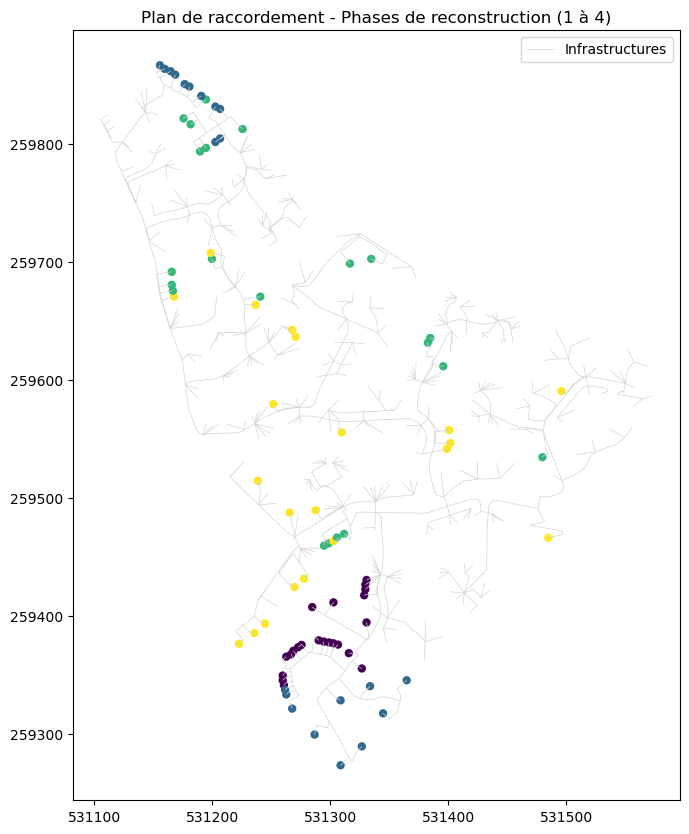

In [56]:
# Nettoyage déjà fait, on refait juste la jointure proprement
batiments_priorite = batiments.merge(
    priorite_bat,
    left_on='id_bat',
    right_on='id_batiment',
    how='left'
)

print(f"Jointure terminée : {batiments_priorite['Phase'].notna().sum()} bâtiments avec une phase sur {len(batiments_priorite)}")

# Visualisation finale
fig, ax = plt.subplots(figsize=(10,10))
infrastructures.plot(ax=ax, color='lightgray', linewidth=0.5, label="Infrastructures")
batiments_priorite.plot(ax=ax, column='Phase', cmap='viridis', legend=True, markersize=25)
plt.title("Plan de raccordement - Phases de reconstruction (1 à 4)")
plt.legend()
plt.show()


In [57]:
# === Sélection des colonnes clés ===
export_final = batiments_priorite[['id_bat', 'ordre_priorite', 'Phase']].dropna(subset=['Phase'])

# Trier par ordre de priorité
export_final = export_final.sort_values(by='ordre_priorite')

print("Fichier final prêt à être exporté :")
display(export_final.head(10))

# === Export vers Excel et CSV ===
export_final.to_excel("plan_raccordement_final.xlsx", index=False)
export_final.to_csv("plan_raccordement_final.csv", index=False)

print("Fichiers 'plan_raccordement_final.xlsx' et 'plan_raccordement_final.csv' exportés avec succès !")


Fichier final prêt à être exporté :


,id_bat,ordre_priorite,Phase
375,E000258,1.0,Phase 1
187,E000194,2.0,Phase 1
114,E000259,3.0,Phase 1
51,E000225,4.0,Phase 1
64,E000196,5.0,Phase 1
118,E000195,6.0,Phase 1
370,E000228,7.0,Phase 1
290,E000229,8.0,Phase 1
190,E000302,9.0,Phase 1
16,E000226,10.0,Phase 1


PermissionError: [Errno 13] Permission denied: 'plan_raccordement_final.xlsx'

In [58]:
# === Export du plan final au format Shapefile ===
batiments_export = batiments_priorite[['id_bat', 'ordre_priorite', 'Phase', 'geometry']].dropna(subset=['Phase'])
batiments_export.to_file("plan_raccordement_final.shp", driver="ESRI Shapefile")

print("Fichier 'plan_raccordement_final.shp' exporté avec succès !")


Fichier 'plan_raccordement_final.shp' exporté avec succès !


C:\Users\33767\AppData\Local\Temp\ipykernel_6392\2449619154.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  batiments_export.to_file("plan_raccordement_final.shp", driver="ESRI Shapefile")
C:\Users\33767\anaconda3\lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'ordre_priorite' to 'ordre_prio'
  ogr_write(


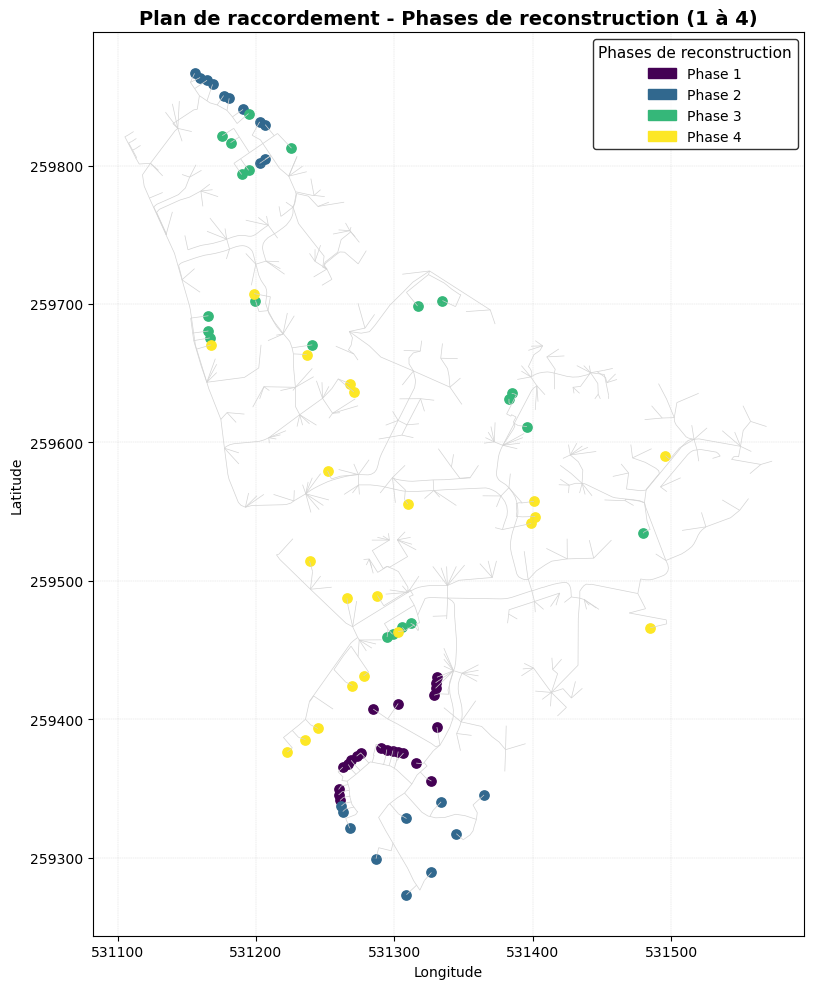

In [63]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Charger les fichiers shapefiles
plan_final = gpd.read_file("plan_raccordement_final.shp")
infrastructures = gpd.read_file("infrastructures.shp")

# === Création de la carte ===
fig, ax = plt.subplots(figsize=(10, 10))

# Fond : infrastructures électriques
infrastructures.plot(ax=ax, color='lightgray', linewidth=0.5, label="Infrastructures")

# Palette cohérente par phase (1 → 4)
couleurs = {
    "Phase 1": "#440154",  # violet
    "Phase 2": "#31688e",  # bleu
    "Phase 3": "#35b779",  # vert
    "Phase 4": "#fde725"   # jaune
}

# Tracer chaque phase séparément pour construire une vraie légende
for phase, couleur in couleurs.items():
    subset = plan_final[plan_final["Phase"] == phase]
    subset.plot(ax=ax, color=couleur, markersize=45, label=phase)

# Ajouter la légende manuellement
patches = [mpatches.Patch(color=c, label=p) for p, c in couleurs.items()]
plt.legend(
    handles=patches,
    title="Phases de reconstruction",
    title_fontsize=11,
    fontsize=10,
    loc="upper right",
    frameon=True,
    facecolor='white',
    edgecolor='black'
)

# Titres et axes
plt.title("Plan de raccordement - Phases de reconstruction (1 à 4)", fontsize=14, fontweight='bold')
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Grille + finition
plt.grid(visible=True, linestyle="--", linewidth=0.3, alpha=0.5)
plt.tight_layout()
plt.show()


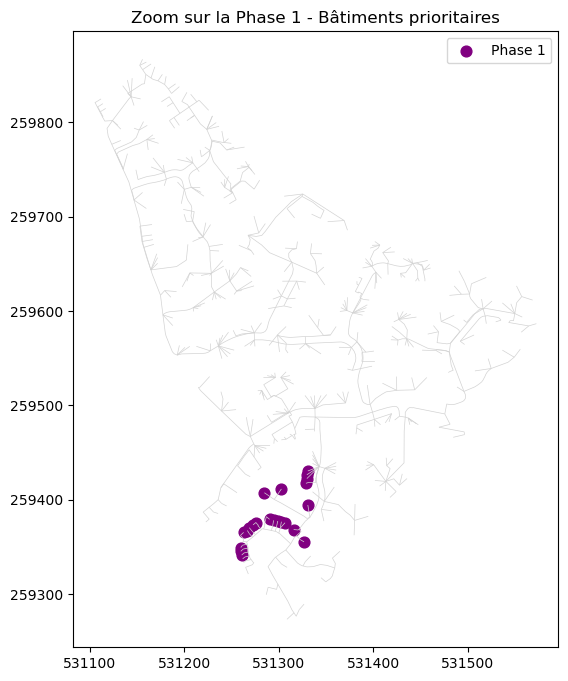

In [61]:
# === Zoom sur la Phase 1 (bâtiments les plus prioritaires) ===
phase1 = plan_final[plan_final["Phase"] == "Phase 1"]

fig, ax = plt.subplots(figsize=(8, 8))
infrastructures.plot(ax=ax, color='lightgray', linewidth=0.5)
phase1.plot(ax=ax, color='purple', markersize=60, label='Phase 1')

plt.title("Zoom sur la Phase 1 - Bâtiments prioritaires")
plt.legend()
plt.show()
